# Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Zooming Methods

## Pixel Replication

In [2]:
def pixel_replication(img, zooming_factor):
    height = img.shape[0]
    width = img.shape[1]
    new_height = height * zooming_factor
    new_width = width * zooming_factor
    new_img = np.zeros((new_height, new_width), np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            new_img[i, j] = img[i // zooming_factor, j // zooming_factor]

    return new_img

### Example on a simple matrix

In [3]:
sample_matrix = np.array([[1, 2], [3, 4]], np.uint8)
zooming_factor = 2
new_img = pixel_replication(sample_matrix, zooming_factor)

print("Matrix before zooming:")
print(sample_matrix)
print("Matrix after zooming:")
print(new_img)

Matrix before zooming:
[[1 2]
 [3 4]]
Matrix after zooming:
[[1 1 2 2]
 [1 1 2 2]
 [3 3 4 4]
 [3 3 4 4]]


### Demonstration on an image

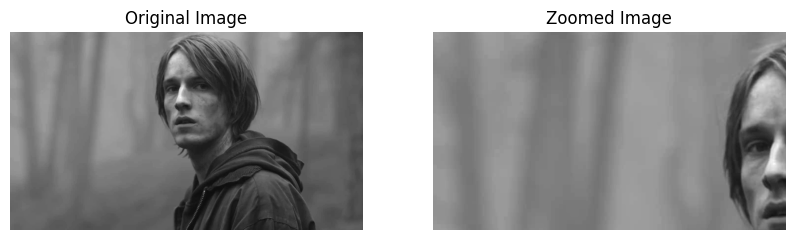

In [4]:
image_path = 'images/test.jpg'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

zooming_factor = 2

zoomed_image = pixel_replication(image, zooming_factor)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.axis('off')

plt.xlim(0, image.shape[1])
plt.ylim(image.shape[0], 0)  

plt.show()

## Zero Order Hold

In [5]:
def zero_order_hold(img, zooming_factor = 2):
    height = img.shape[0]
    width = img.shape[1]
    new_height = (height * zooming_factor) - 1
    new_width = (width * zooming_factor) - 1
    new_img = np.zeros((new_height, new_width), np.uint8)

    for i in range(height):
        for j in range(width - 1):
            new_img[2 * i, 2 * j] = img[i, j] 
            new_img[2 * i, 2 * j + 1] = (int(img[i, j]) + int(img[i, j + 1])) // 2  
            
        new_img[2 * i, 2 * width - 2] = img[i, width - 1]
    
    for i in range(height - 1):
        for j in range(new_width):
            new_img[2 * i + 1, j] = (int(new_img[2 * i, j]) + int(new_img[2 * i + 2, j])) // 2
            
    return new_img            

### Example on a simple matrix

In [6]:
sample_matrix = np.array([[1, 2], [3, 4]], np.uint8)    
zooming_factor = 2
new_img = zero_order_hold(sample_matrix, zooming_factor)

print("Matrix before zooming:")
print(sample_matrix)
print("Matrix after zooming:")
print(new_img)

Matrix before zooming:
[[1 2]
 [3 4]]
Matrix after zooming:
[[1 1 2]
 [2 2 3]
 [3 3 4]]


### Demonstration on an image

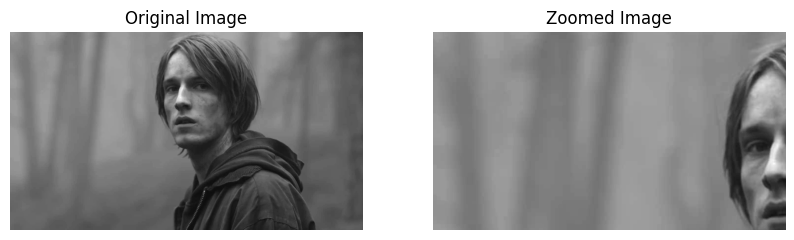

In [7]:
image_path = 'images/test.jpg'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

zooming_factor = 2

zoomed_image = zero_order_hold(image, zooming_factor)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.axis('off')

plt.xlim(0, image.shape[1])
plt.ylim(image.shape[0], 0)  

plt.show()

## K Times Zooming

In [8]:
def k_times_zooming(img, zooming_factor):
    height, width = img.shape
    new_height = zooming_factor * (height - 1) + 1
    new_width = zooming_factor * (width - 1) + 1
    new_img = np.zeros((new_height, new_width), np.uint16)

    for i in range(height):
        for j in range(width - 1):
            new_img[zooming_factor * i, zooming_factor * j] = img[i, j]  

            diff = (int(img[i, j + 1]) - int(img[i, j]))

            if(diff > 0):
                diff = diff // zooming_factor
            else:
                diff = -(-diff // zooming_factor)
            
            for k in range(1, zooming_factor):
                new_img[zooming_factor * i, zooming_factor * j + k] = int(img[i, j]) + diff * k
        
        new_img[zooming_factor * i, zooming_factor * (width - 1)] = img[i, width - 1]
    
    for i in range(height - 1):
        for j in range(new_width):
            diff = abs((int(new_img[zooming_factor * (i + 1), j]) - int(new_img[zooming_factor * i, j])))
            diff = diff // zooming_factor

            min_value = min(int(new_img[zooming_factor * (i + 1), j]), int(new_img[zooming_factor * i, j]))
            
            for k in range(1, zooming_factor):
                new_img[zooming_factor * i + k, j] = min_value + diff * k
    
    new_img[zooming_factor * (height - 1):, :] = new_img[zooming_factor * (height - 1), :]
    
    return new_img

### Example on a simple matrix

In [9]:
sample_matrix = np.array([[15, 30, 15], [30, 15, 30]], np.uint16)
zooming_factor = 3

new_img = k_times_zooming(sample_matrix, zooming_factor)

print("Matrix before zooming:")
print(sample_matrix)
print("Matrix after zooming:")
print(new_img)

Matrix before zooming:
[[15 30 15]
 [30 15 30]]
Matrix after zooming:
[[15 20 25 30 25 20 15]
 [20 21 21 20 21 21 20]
 [25 22 22 25 22 22 25]
 [30 25 20 15 20 25 30]]


### Demonstration on an image

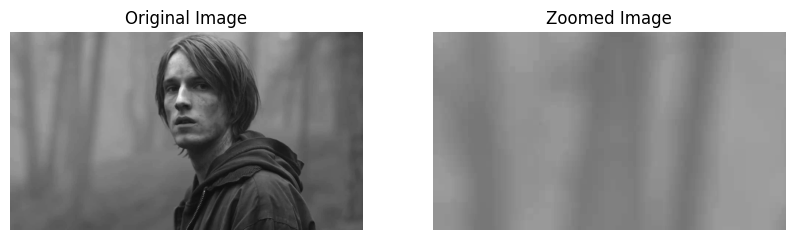

In [10]:
image_path = 'images/test.jpg'
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

zooming_factor = 3

zoomed_image = k_times_zooming(image, zooming_factor)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.axis('off')

plt.xlim(0, image.shape[1])
plt.ylim(image.shape[0], 0)  

plt.show()

# 2. Perspective Transformation

In [11]:
def calculate_perspective_matrix(src, dst):
    src = np.array(src)
    dst = np.array(dst)

    A = np.zeros((8, 8))
    B = np.zeros(8)

    for i in range(4):
        x, y = src[i]
        u, v = dst[i]

        A[2 * i] = [x, y, 1, 0, 0, 0, -u * x, -u * y]
        A[2 * i + 1] = [0, 0, 0, x, y, 1, -v * x, -v * y]

        B[2 * i] = u
        B[2 * i + 1] = v

    X = np.linalg.solve(A, B)

    perspective_matrix = np.array([[X[0], X[1], X[2]], [X[3], X[4], X[5]], [X[6], X[7], 1]])

    return perspective_matrix

In [12]:
def apply_perspective_transform(image, perspective_matrix, output_width, output_height):

    output_image = np.zeros((output_height, output_width, 3), dtype=image.dtype)
    inverse_matrix = np.linalg.inv(perspective_matrix)
    
    for row in range(output_height):
        for col in range(output_width):
            destination_point = np.array([col, row, 1])
            
            source_point = np.dot(inverse_matrix, destination_point)
            source_point /= source_point[2] 
            
            src_x, src_y = int(source_point[0]), int(source_point[1])
    
            if 0 <= src_x < image.shape[1] and 0 <= src_y < image.shape[0]:
                output_image[row, col] = image[src_y, src_x]
    
    return output_image


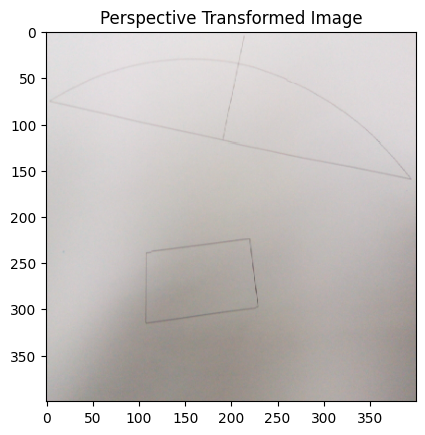

In [13]:
image = cv2.imread('images/samp1.jpg')

src_points = np.float32([[200, 200], [850, 200], [850, 600], [200, 600]])
dst_points = np.float32([[0, 0], [400, 0], [400, 400], [0, 400]])
width, height = 400, 400

transformation_matrix = calculate_perspective_matrix(src_points, dst_points)
transformed_image = apply_perspective_transform(image, transformation_matrix, width, height)

plt.title('Perspective Transformed Image')
plt.imshow(transformed_image)

## Comparative Display

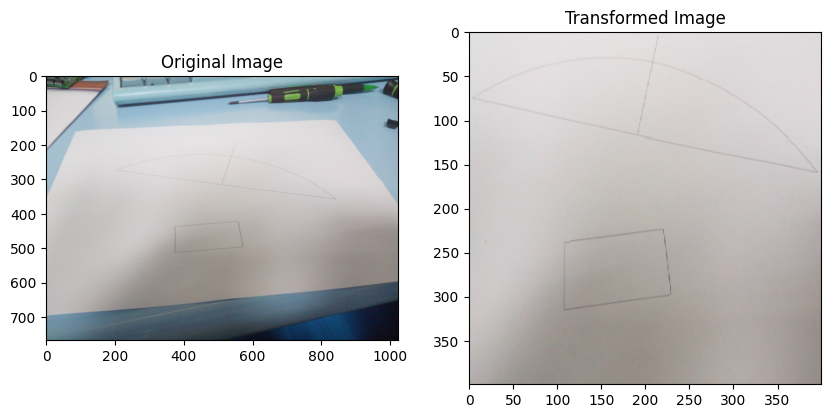

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(transformed_image)
plt.show()